<a href="https://colab.research.google.com/github/withspencerr/pricing-optimization-lab/blob/main/pricing_optimization_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

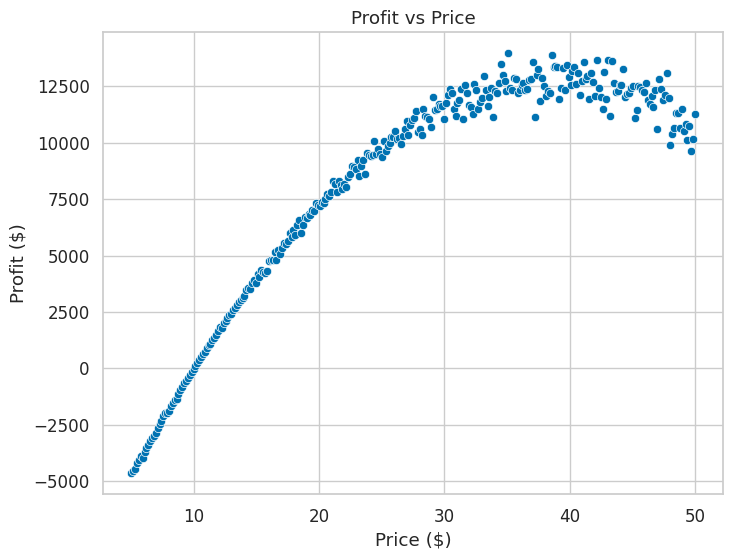

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


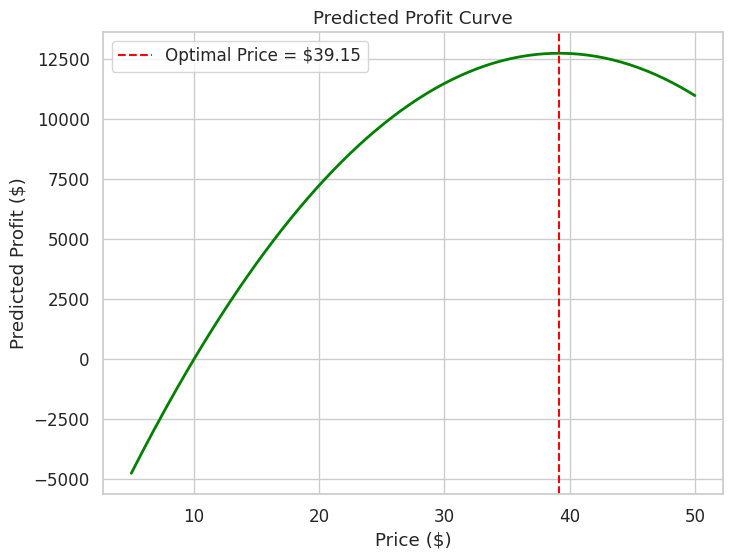

💡 Optimal Price: $39.15
📈 Maximum Predicted Profit: $12,744


In [1]:
# Pricing Optimization Simulation
# Author: Spencer Cai | MSBA @ WashU
# Goal: Simulate pricing data, model demand, and find profit-maximizing price.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# ===== 1. 模拟市场数据 =====
n = 300
price = np.linspace(5, 50, n)
ad_spend = np.random.uniform(2000, 10000, n)
competitor_price = np.random.uniform(10, 45, n)

# 模拟需求函数: 需求 = f(价格, 广告, 竞争价格)
# 负相关: 价格↑ → 销量↓；竞争价格↑ → 销量↑；广告↑ → 销量↑
demand = 1000 - 15*price + 0.5*(competitor_price) + 0.002*ad_spend + np.random.normal(0, 20, n)

# 确保销量非负
demand = np.maximum(demand, 0)

# 收入与利润
cost_per_unit = 10
revenue = price * demand
profit = (price - cost_per_unit) * demand

df = pd.DataFrame({
    "Price": price,
    "CompetitorPrice": competitor_price,
    "AdSpend": ad_spend,
    "Demand": demand,
    "Revenue": revenue,
    "Profit": profit
})

# ===== 2. 可视化关系 =====
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Price", y="Profit", color="#0072B2")
plt.title("Profit vs Price")
plt.xlabel("Price ($)")
plt.ylabel("Profit ($)")
plt.show()

# ===== 3. 回归模型：预测销量 =====
X = df[["Price", "CompetitorPrice", "AdSpend"]]
y = df["Demand"]
model = LinearRegression().fit(X, y)

# ===== 4. 预测不同价格下的利润 =====
price_range = np.linspace(5, 50, 200)
ad_mean = df["AdSpend"].mean()
comp_mean = df["CompetitorPrice"].mean()

pred_demand = model.predict(np.column_stack([price_range, np.repeat(comp_mean, len(price_range)), np.repeat(ad_mean, len(price_range))]))
pred_demand = np.maximum(pred_demand, 0)

pred_profit = (price_range - cost_per_unit) * pred_demand
opt_price = price_range[np.argmax(pred_profit)]
max_profit = np.max(pred_profit)

# ===== 5. 绘制利润曲线 =====
plt.figure(figsize=(8,6))
plt.plot(price_range, pred_profit, color="green", lw=2)
plt.axvline(opt_price, color="red", linestyle="--", label=f"Optimal Price = ${opt_price:.2f}")
plt.title("Predicted Profit Curve")
plt.xlabel("Price ($)")
plt.ylabel("Predicted Profit ($)")
plt.legend()
plt.show()

print(f"💡 Optimal Price: ${opt_price:.2f}")
print(f"📈 Maximum Predicted Profit: ${max_profit:,.0f}")
